# Insurance Claims- Fraud Detection

## Importing Libreries

In [500]:
#Import libreries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn
import pickle

import warnings
warnings.filterwarnings("ignore")

Importing all neccessory Libreries

## Importing dataset

In [501]:
#Import the dataset

data= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

Importing the dataset and see all columns with first five rows.

## Shape of data with number of rows and columns

In [502]:
data.shape

(1000, 40)

There are 1000 Rows and 40 Columns in dataset

## Detailed description

In [503]:
data.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

We can see the detailed description of all the rows and columns like count, mean value, standard deviation, minimum and maximum value.

# Datatypes of all columns

In [504]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

We have Integer data type ----> months_as_customer, age, policy_number, policy_deductable, policy_deductable, umbrella_limit, insured_zip, capital-gains, capital-loss, incident_hour_of_the_day, number_of_vehicles_involved, bodily_injuries, witnesses, total_claim_amount, injury_claim, property_claim, vehicle_claim, auto_year
                             
object datatypes ----> policy_bind_date, policy_state, policy_csl, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, incident_date, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_location, property_damage, police_report_available, auto_make, auto_model, fraud_reported

float datatypes ----> policy_annual_premium, _c39

all are independent variable accept fraud_reported. fraud_reported is a target variable.

# Checking is there any null value

In [505]:
#check is there any null value present in any column

data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

There are missing values in _c39 column. we can drop that column.

## Visualization of null values

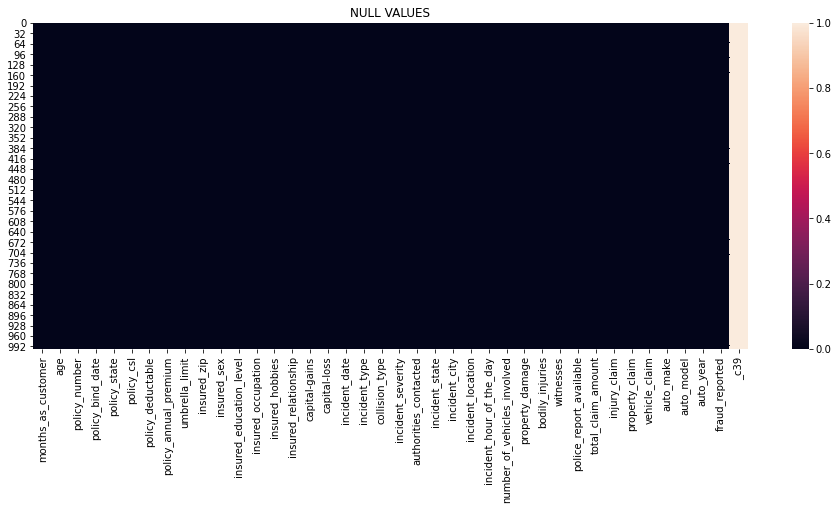

In [506]:
plt.figure(figsize=[16,6])
sn.heatmap(data.isnull())
plt.title("NULL VALUES")
plt.show()

only one column is having all null values which show in white line.

## Before visualization we need to convert target variable to integer data type

In [507]:
data['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [508]:
data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [509]:
# Replace Attrition column to binary encoder
data['fraud_reported'] = data['fraud_reported'].replace({'N':0, 'Y':1})

after converting target variable the Y will become 1 and N will become 0.

In [510]:
data['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

## EDA (Exploratory Data Analysis)

### Visualization (Uni Variate analysis)
Uni variate analysis works with only one variable, hence it is called uni variate.

In [511]:
fe = data[["months_as_customer", "age", "policy_number", "policy_deductable", "policy_deductable", "umbrella_limit", "insured_zip", "capital-gains", "capital-loss", "incident_hour_of_the_day", "number_of_vehicles_involved", "bodily_injuries", "witnesses", "total_claim_amount", "injury_claim", "property_claim", "vehicle_claim", "auto_year",  "policy_annual_premium", "_c39", "fraud_reported" ]]

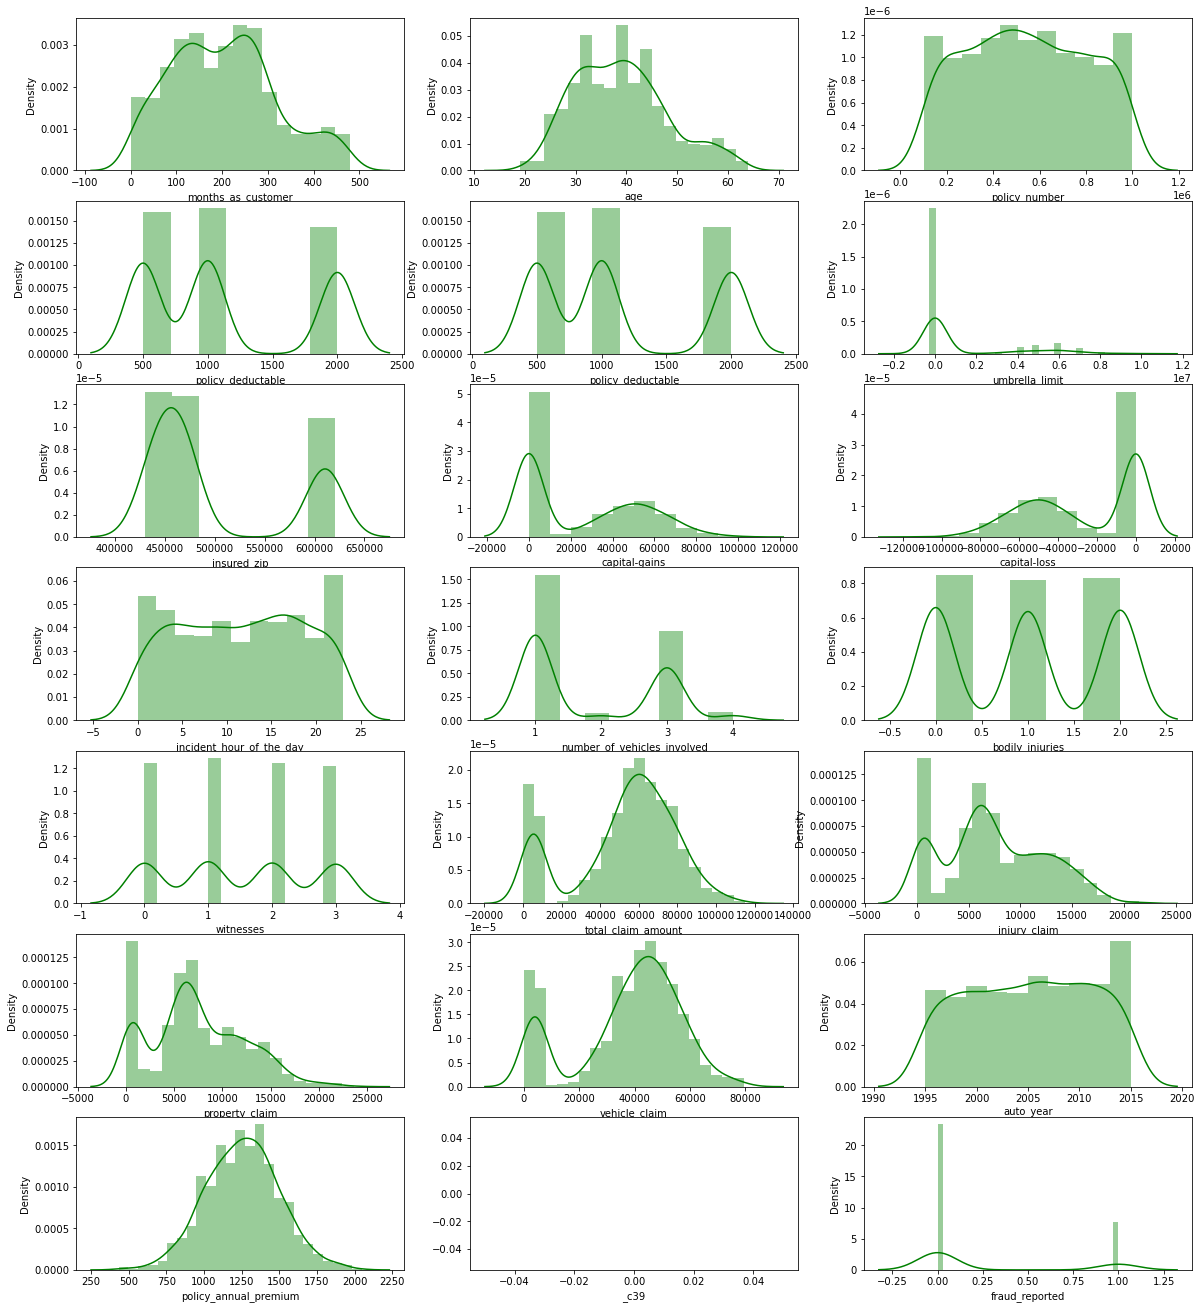

In [512]:
#Relationship Visualizing

plt.figure(figsize = (20,50), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 50: # as we see there are eight columns in the data
        ax = plt.subplot(15,3,plotnumber)
        sn.distplot(fe[column], color = 'g')
        plt.xlabel(column,fontsize=10)
        
    plotnumber += 1
plt.show()

As shown in distplot some input variables are having skewness in it. So, we need remove skewness from that input variable.

fraud_reported is a targate variable and it is having two classes. so, it is a binaryclassification problem.

### Analysis through boxplot

In [513]:
fe = data[["months_as_customer", "age", "policy_number", "policy_deductable", "umbrella_limit", "insured_zip", "capital-gains", "capital-loss", "incident_hour_of_the_day", "number_of_vehicles_involved", "bodily_injuries", "witnesses", "total_claim_amount", "injury_claim", "property_claim", "vehicle_claim", "auto_year",  "policy_annual_premium", "fraud_reported", "_c39" ]]

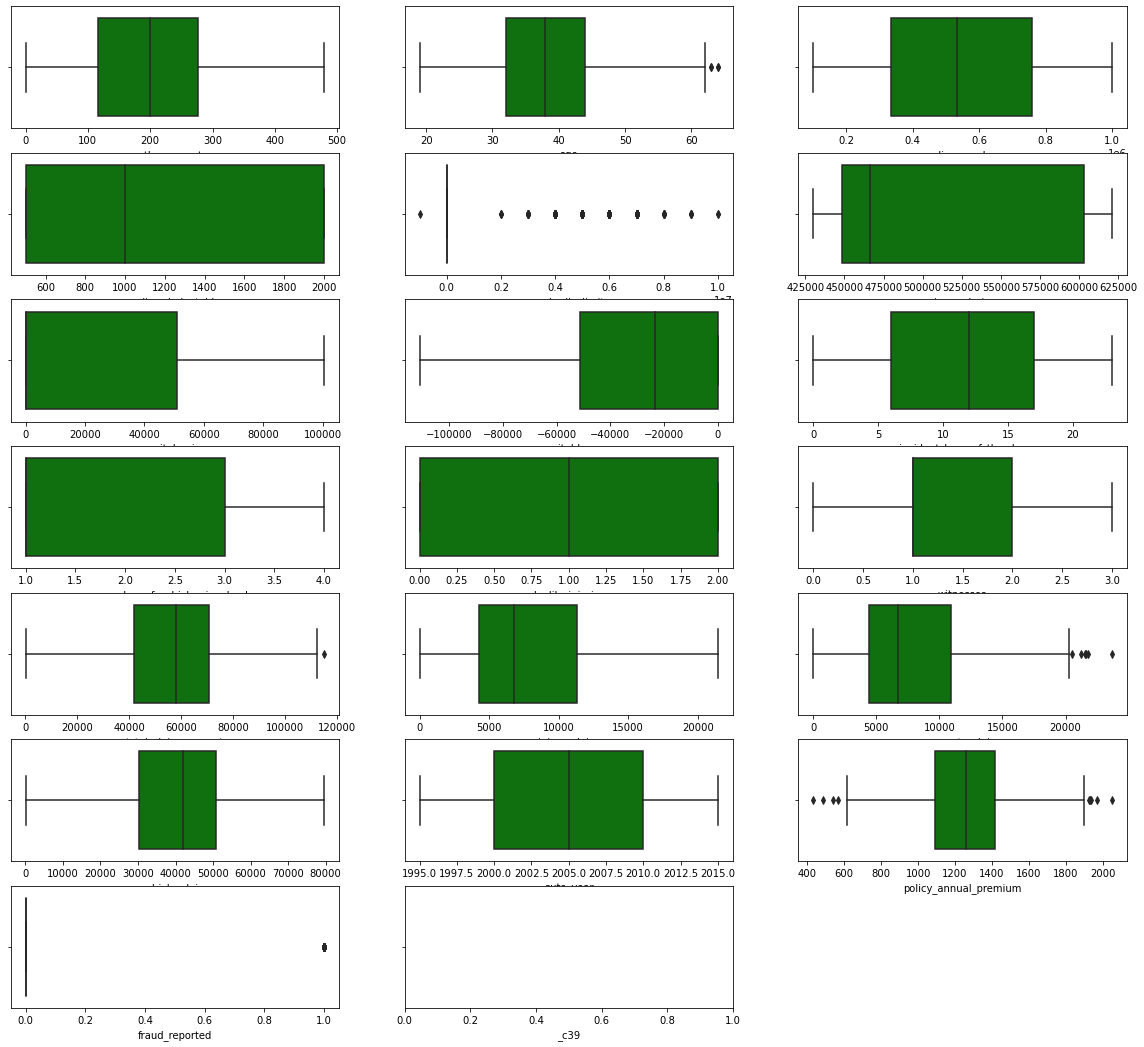

In [514]:
#Relationship Visualizing

plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 50: # as we see there are eight columns in the data
        ax = plt.subplot(15,3,plotnumber)
        sn.boxplot(fe[column], color = 'g')
        plt.xlabel(column,fontsize=10)
        
    plotnumber += 1
plt.show()

As we can see age, umbrella_limit, policy_annual_premium and property_claim are having outliers in it.

## Bi variate analysis
Bi variate analysis is works with two variables.

In [515]:
fe = data[["months_as_customer", "age", "policy_number", "policy_deductable", "umbrella_limit", "insured_zip", "capital-gains", "capital-loss", "incident_hour_of_the_day", "number_of_vehicles_involved", "bodily_injuries", "witnesses", "total_claim_amount", "injury_claim", "property_claim", "vehicle_claim", "auto_year",  "policy_annual_premium", "fraud_reported", "_c39" ]]

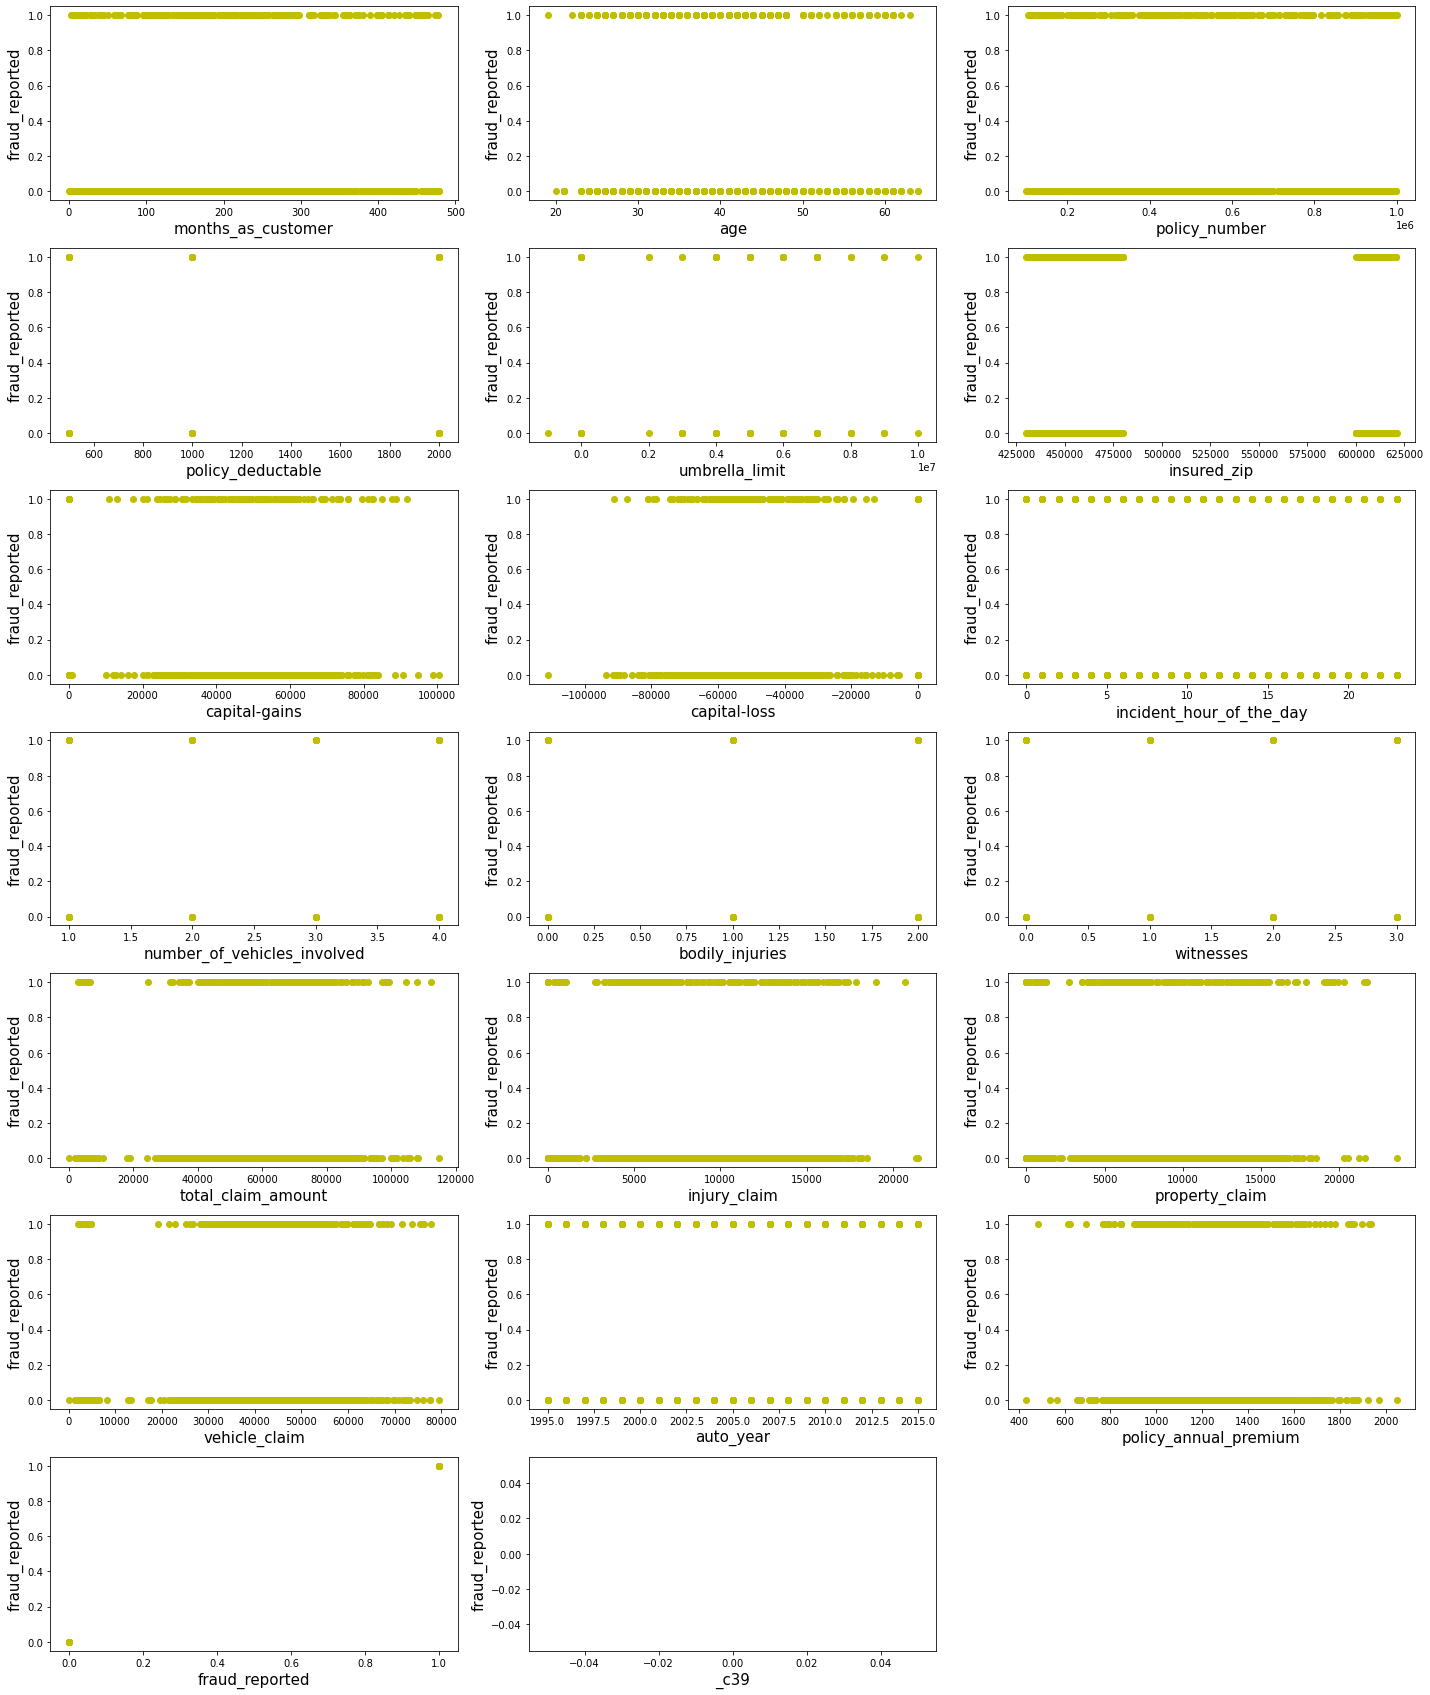

In [516]:
#Relationship Visualizing

plt.figure(figsize = (20,50), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 40:
        ax = plt.subplot(15,3,plotnumber)
        plt.scatter(fe[column],fe['fraud_reported'], color='y')
        plt.xlabel(column,fontsize=15)
        plt.ylabel('fraud_reported', fontsize=15)
    plotnumber += 1
plt.tight_layout()

As we have seen in the plot some outliers are also present in it.

## Multi Variate analysis
Multi variate analysis find the relationship with all variables.
Now we will visualize the data and check the coiefficient of multicollinearity

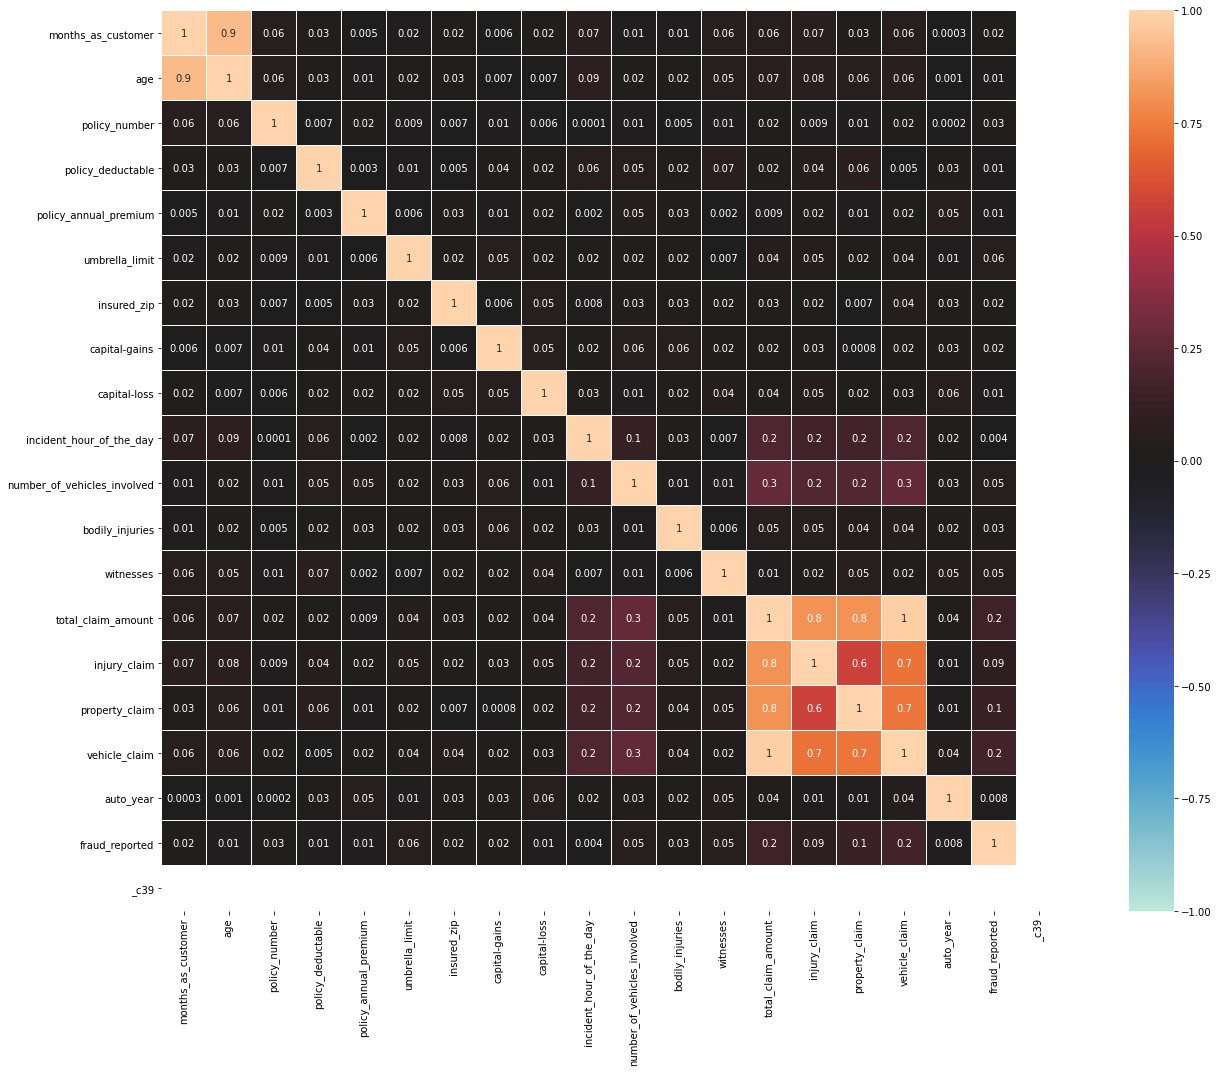

In [517]:
data_cor = data.corr().abs()

plt.figure(figsize = (20,15))
sn.heatmap(data_cor, vmin=-1, vmax= 1, annot=True, square=True,
          center=0, fmt='.1g', linewidths=.1)
plt.tight_layout()

As shown in plot incident_hour_of_the_day are poorly correlated with target variable and total_claim_amount, vehicle_claim are strongly correlated with target variable.

_c39 is not having any relation with target variable

## Find out which columns are positively and negatively correlated with each other

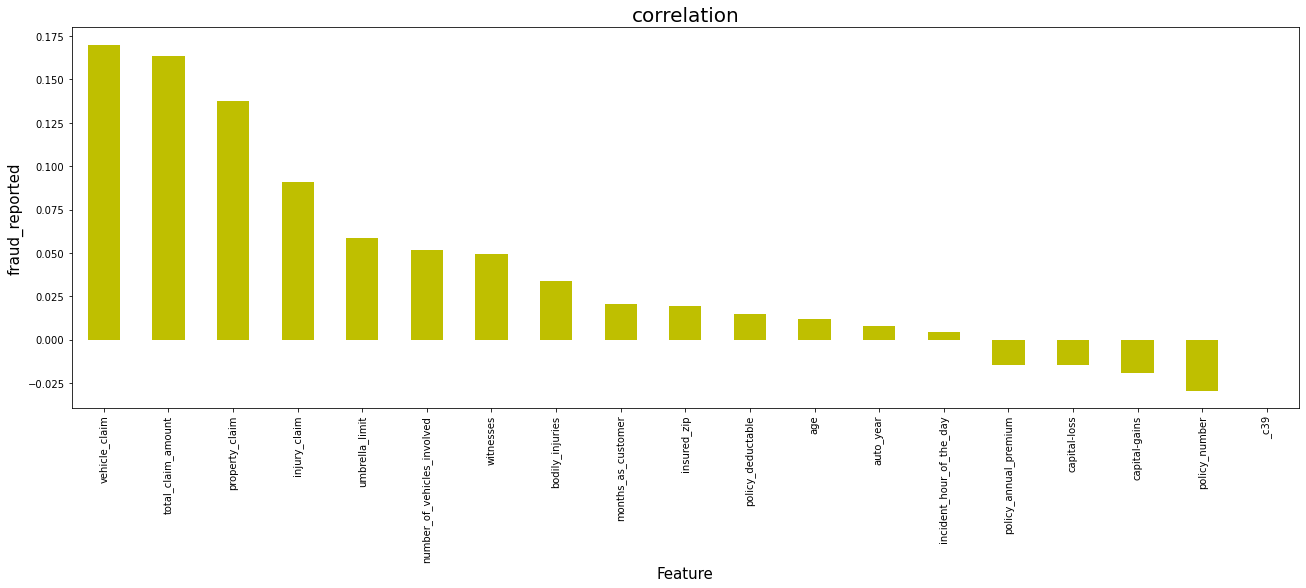

In [518]:
plt.figure(figsize=(22,7))
data.corr()['fraud_reported'].sort_values(ascending = False).drop(['fraud_reported']).plot(kind = 'bar', color = 'y')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('fraud_reported', fontsize = 15)
plt.title('correlation', fontsize = 20)
plt.show()

as we have saw in the plot fnlwgt and target variable is having very less correlation with each other. 

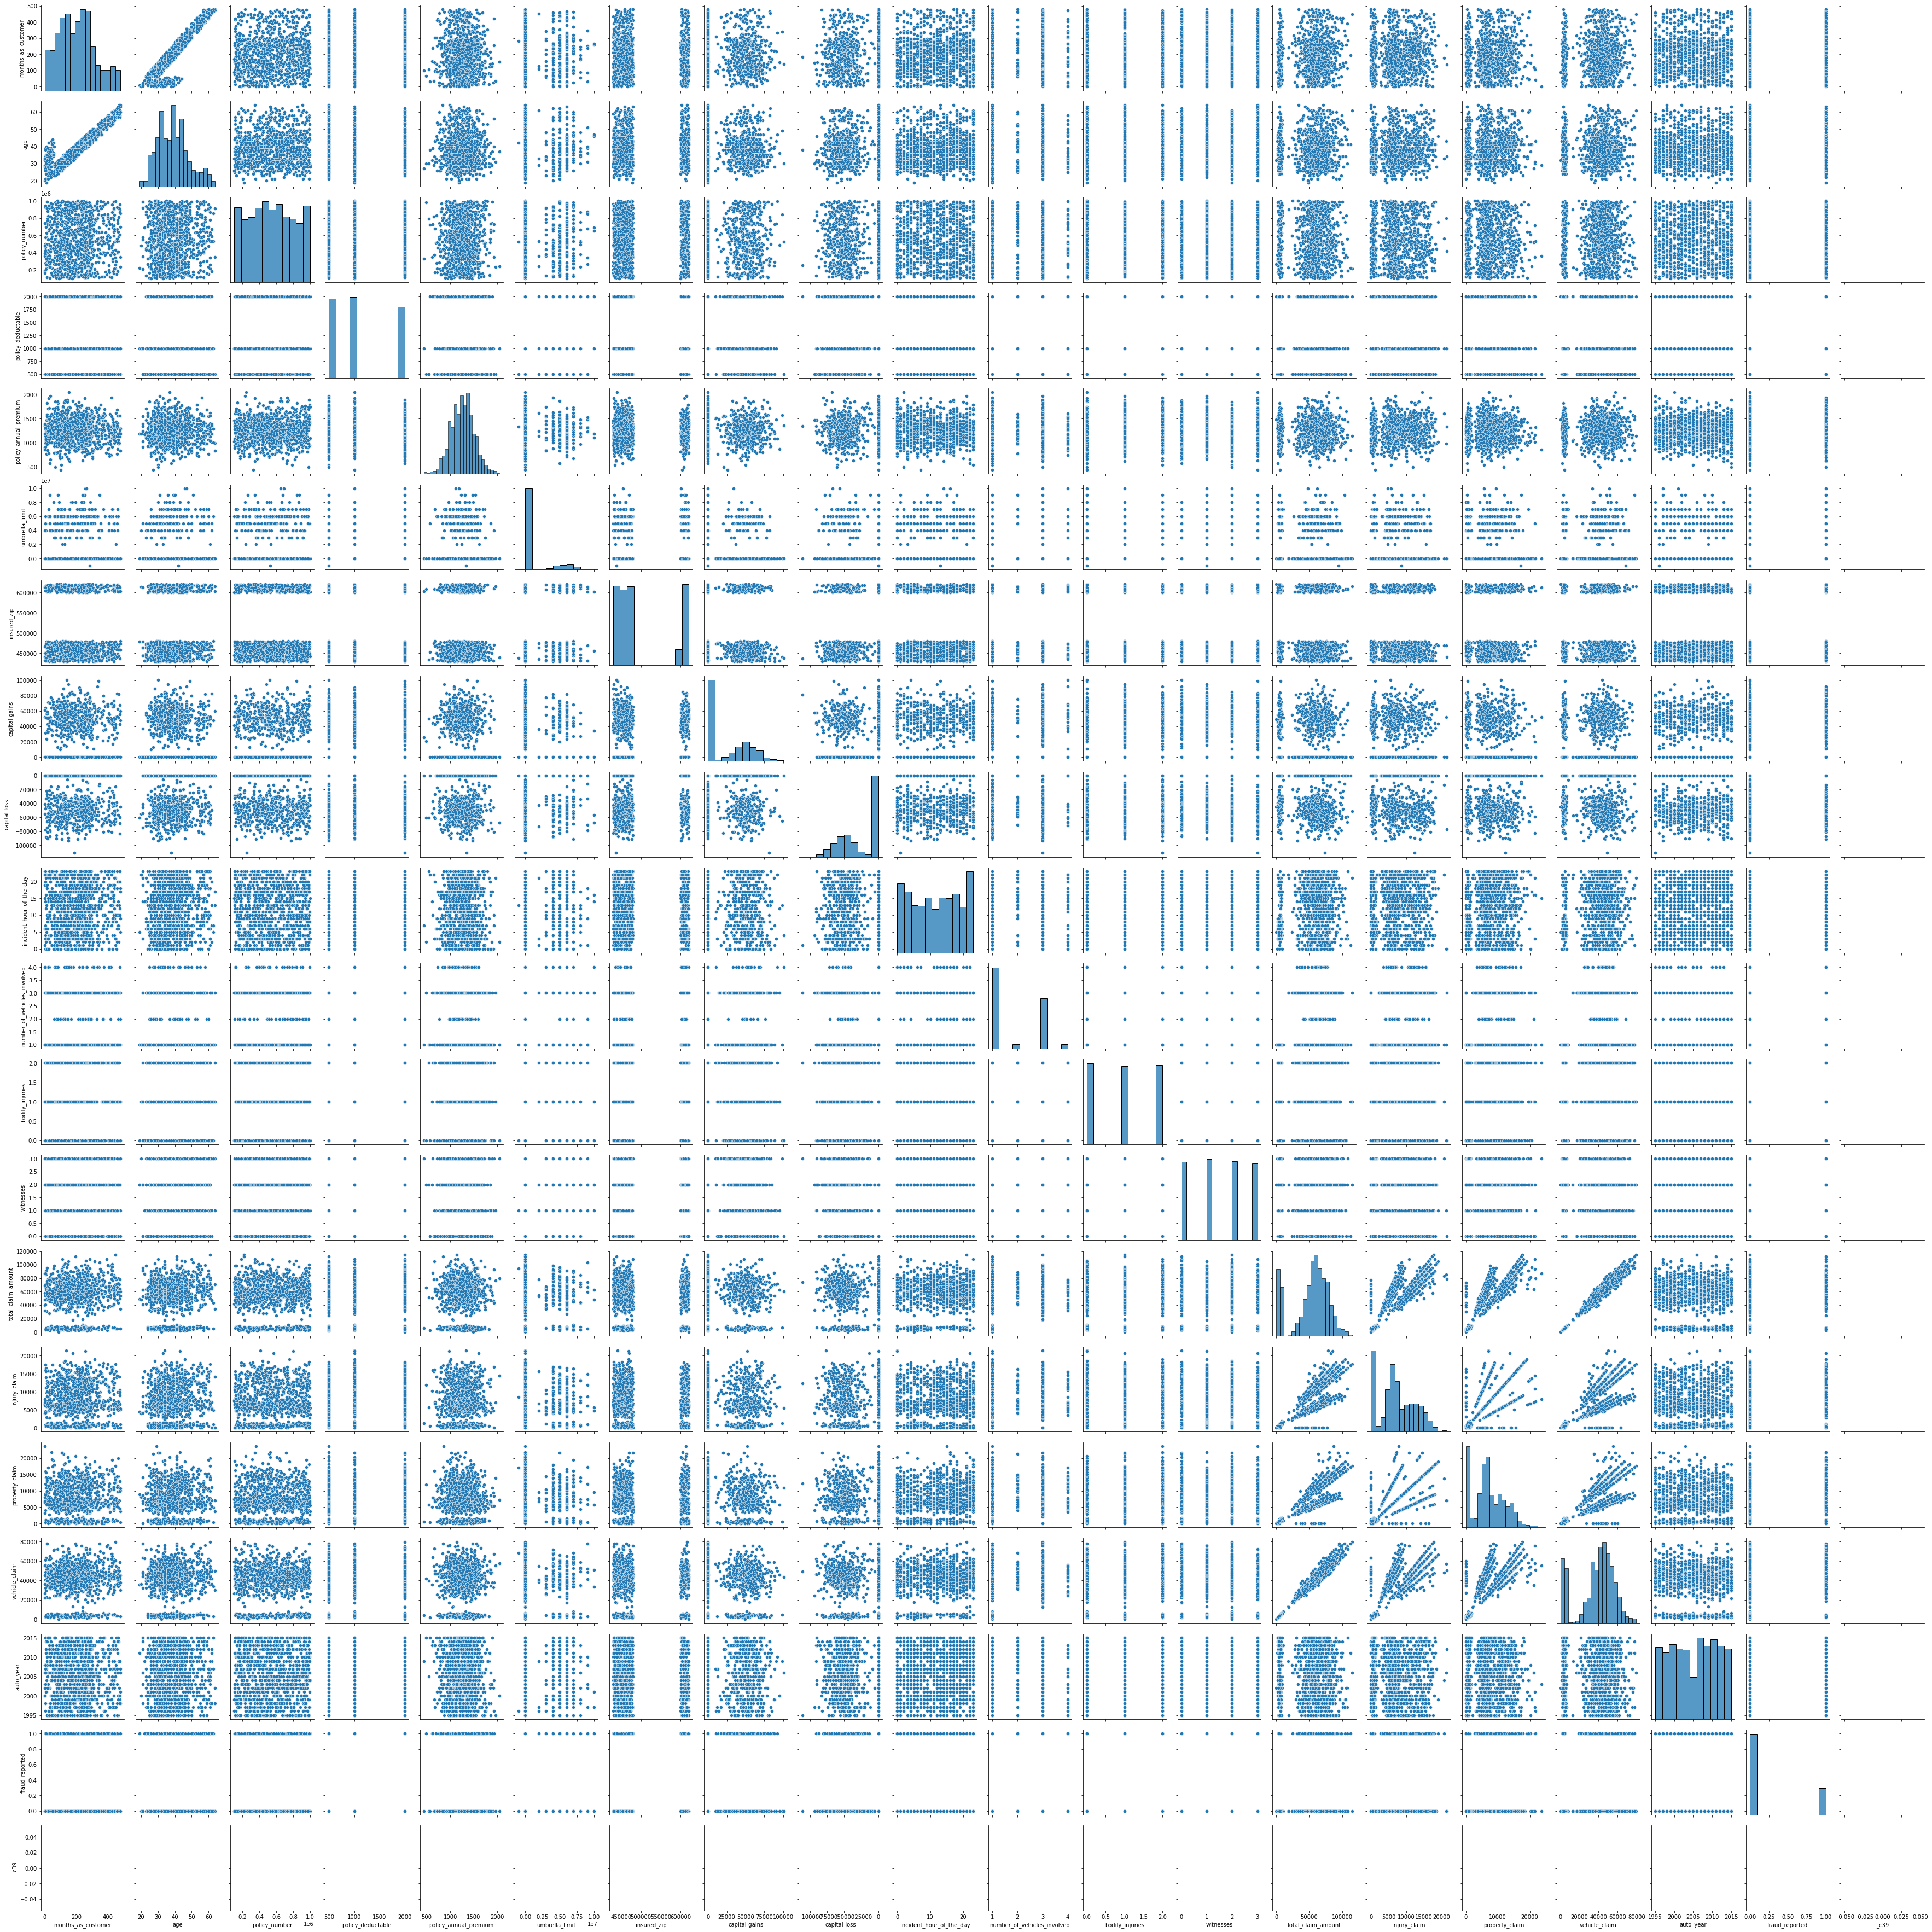

In [519]:
sn.pairplot(data)
plt.show()

In above pairplot we can see each and every coloumn relationship with each other.

#### After visualization conclude that all input variables are having some/good amount relationship with target variable. Now proceed futher for next steps:

## Encoding/Droping 

In [520]:
# Check unique values of policy_bind_date column
data['policy_bind_date'].unique()

array(['17-10-2014', '27-06-2006', '06-09-2000', '25-05-1990',
       '06-06-2014', '12-10-2006', '04-06-2000', '03-02-1990',
       '05-02-1997', '25-07-2011', '26-05-2002', '29-05-1999',
       '20-11-1997', '26-10-2012', '28-12-1998', '19-10-1992',
       '08-06-2005', '15-11-2004', '28-12-2014', '02-08-1992',
       '25-06-2002', '27-11-2005', '27-05-1994', '08-02-1991',
       '02-02-1996', '05-12-2013', '20-09-1990', '18-07-2002',
       '08-02-1990', '04-03-2014', '18-02-2000', '19-06-2008',
       '01-08-2003', '04-04-1992', '13-01-1991', '08-08-2010',
       '09-03-2003', '03-02-1993', '25-11-2002', '27-07-1997',
       '08-05-1995', '30-08-2012', '30-04-2006', '13-04-2003',
       '05-12-2007', '21-08-2006', '08-01-1990', '18-03-1990',
       '07-01-2008', '10-03-1997', '10-01-2004', '20-08-1994',
       '02-06-2002', '28-04-1994', '17-08-2014', '11-08-2007',
       '20-11-2008', '18-10-1995', '19-05-1993', '26-02-2005',
       '14-02-1990', '30-09-1993', '10-06-2014', '28-10

In [521]:
# Check unique values of policy_state column
data['policy_state'].unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [522]:
# Check unique values of policy_csl column
data['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [523]:
# Check unique values of insured_sex column
data['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [524]:
# Check unique values of insured_education_level column
data['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [525]:
# Check unique values of insured_occupation column
data['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

In [526]:
# Check unique values of insured_hobbies column
data['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [527]:
# Check unique values of insured_relationship column
data['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

In [528]:
# Check unique values of incident_date column
data['incident_date'].unique()

array(['25-01-2015', '21-01-2015', '22-02-2015', '10-01-2015',
       '17-02-2015', '02-01-2015', '13-01-2015', '27-02-2015',
       '30-01-2015', '05-01-2015', '06-01-2015', '15-02-2015',
       '22-01-2015', '08-01-2015', '15-01-2015', '29-01-2015',
       '19-01-2015', '01-01-2015', '10-02-2015', '11-01-2015',
       '24-02-2015', '09-01-2015', '28-01-2015', '07-01-2015',
       '18-01-2015', '28-02-2015', '12-02-2015', '24-01-2015',
       '03-01-2015', '16-01-2015', '14-02-2015', '21-02-2015',
       '18-02-2015', '26-02-2015', '17-01-2015', '27-01-2015',
       '11-02-2015', '12-01-2015', '06-02-2015', '20-01-2015',
       '02-02-2015', '20-02-2015', '08-02-2015', '23-02-2015',
       '01-03-2015', '14-01-2015', '19-02-2015', '09-02-2015',
       '26-01-2015', '23-01-2015', '31-01-2015', '03-02-2015',
       '01-02-2015', '05-02-2015', '25-02-2015', '16-02-2015',
       '13-02-2015', '04-02-2015', '07-02-2015', '04-01-2015'],
      dtype=object)

In [529]:
# Check unique values of incident_type column
data['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

In [530]:
# Check unique values of collision_type column
data['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [531]:
# Check unique values of incident_severity column
data['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [532]:
# Check unique values of authorities_contacted column
data['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [533]:
# Check unique values of incident_severity column
data['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [534]:
# Check unique values of authorities_contacted column
data['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [535]:
# Check unique values of incident_state column
data['incident_state'].unique()

array(['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA'], dtype=object)

In [536]:
# Check unique values of incident_city column
data['incident_city'].unique()

array(['Columbus', 'Riverwood', 'Arlington', 'Springfield', 'Hillsdale',
       'Northbend', 'Northbrook'], dtype=object)

In [537]:
# Check unique values of incident_location column
data['incident_location'].unique()

array(['9935 4th Drive', '6608 MLK Hwy', '7121 Francis Lane',
       '6956 Maple Drive', '3041 3rd Ave', '8973 Washington St',
       '5846 Weaver Drive', '3525 3rd Hwy', '4872 Rock Ridge',
       '3066 Francis Ave', '1558 1st Ridge', '5971 5th Hwy',
       '6655 5th Drive', '6582 Elm Lane', '6851 3rd Drive',
       '9573 Weaver Ave', '5074 3rd St', '4546 Tree St',
       '3842 Solo Ridge', '8101 3rd Ridge', '5380 Pine St',
       '8957 Weaver Drive', '2526 Embaracadero Ave', '5667 4th Drive',
       '2502 Apache Hwy', '3418 Texas Lane', '2533 Elm St',
       '3790 Andromedia Hwy', '3220 Rock Drive', '2100 Francis Drive',
       '4687 5th Drive', '9038 2nd Lane', '6092 5th Ave',
       '8353 Britain Ridge', '3540 Maple St', '3104 Sky Drive',
       '4981 Weaver St', '6676 Tree Lane', '3930 Embaracadero St',
       '3422 Flute St', '4862 Lincoln Hwy', '5719 2nd Lane',
       '3221 Solo Ridge', '6660 MLK Drive', '1699 Oak Drive',
       '4234 Cherokee Lane', '7476 4th St', '8907 Tree Ave

In [538]:
# Check unique values of property_damage column
data['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [539]:
# Check unique values of police_report_available column
data['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [540]:
# Check unique values of auto_make column
data['auto_make'].unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

In [541]:
# Check unique values of auto_model column
data['auto_model'].unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

In [542]:
#drop _c39 column
data=data.drop(['_c39'], axis=1)

### Encoding all columns with label encoder

In [543]:
#import label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [544]:
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=le.fit_transform(data[i].values.reshape(-1,1))

as we can see in loan id columns all values are having unique count, so we can drop that column.

In [545]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                 int32
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                    int32
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day 

all object datatype column encoded.

## Visualization of all input variables correlation with targate variable

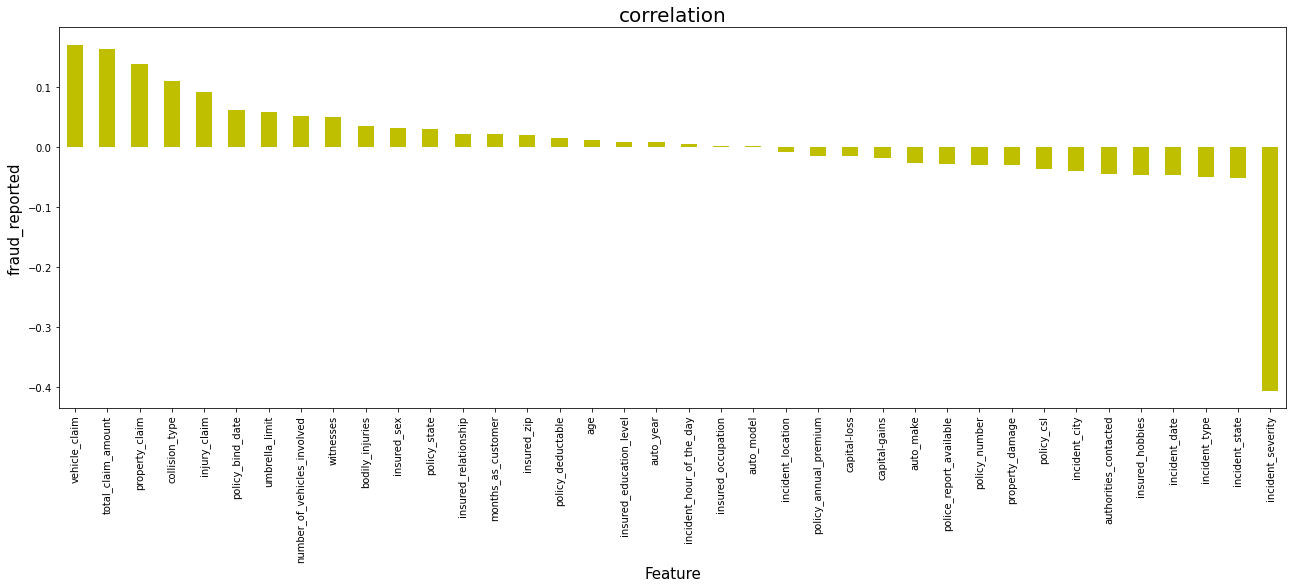

In [546]:
plt.figure(figsize=(22,7))
data.corr()['fraud_reported'].sort_values(ascending = False).drop(['fraud_reported']).plot(kind = 'bar', color = 'y')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('fraud_reported', fontsize = 15)
plt.title('correlation', fontsize = 20)
plt.show()

##### As we can see there are some columns are having poor correlation with target variable, so we can drop that columns:

In [547]:
#drop Fnlwgt column because poor correlation with auto_model variable
data=data.drop(['auto_model'], axis=1)

In [548]:
#drop insured_occupation column
data=data.drop(['insured_occupation'], axis=1)

In [549]:
data

months_as_customer  age  policy_number  policy_bind_date  policy_state  \
0                   328   48         521585               532             2   
1                   228   42         342868               821             1   
2                   134   29         687698               186             2   
3                   256   41         227811               766             0   
4                   228   44         367455               181             0   
..                  ...  ...            ...               ...           ...   
995                   3   38         941851               487             2   
996                 285   41         186934               129             0   
997                 130   34         918516               509             2   
998                 458   62         533940               573             0   
999                 456   60         556080               359             2   

     policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0             1               1000                1406.91               0   
1             1               2000                1197.22         5000000   
2             0               2000                1413.14         5000000   
3             1               2000                1415.74         6000000   
4             2               1000                1583.91         6000000   
..          ...                ...                    ...             ...   
995           2               1000                1310.80               0   
996           0               1000                1436.79               0   
997           1                500                1383.49         3000000   
998           2               2000                1356.92         5000000   
999           1               1000                 766.19               0   

     insured_zip  ...  bodily_injuries  witnesses  police_report_available  \
0         466132  ...                1          2                        2   
1         468176  ...                0          0                        0   
2         430632  ...                2          3                        1   
3         608117  ...                1          2                        1   
4         610706  ...                0          1                        1   
..           ...  ...              ...        ...                      ...   
995       431289  ...                0          1                        0   
996       608177  ...                2          3                        0   
997       442797  ...                2          3                        2   
998       441714  ...                0          1                        2   
999       612260  ...                0          3                        0   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0                 71610          6510           13020          52080   
1                  5070           780             780           3510   
2                 34650          7700            3850          23100   
3                 63400          6340            6340          50720   
4                  6500          1300             650           4550   
..                  ...           ...             ...            ...   
995               87200         17440            8720          61040   
996              108480         18080           18080          72320   
997               67500          7500            7500          52500   
998               46980          5220            5220          36540   
999                5060           460             920           3680   

     auto_make  auto_year  fraud_reported  
0           10       2004               1  
1            8       2007               1  
2            4       2007               0  
3            3       2014               1  
4            0       2009               0  
..         ...        ...             ...  
995          6       

# Remove outliers 
Now we found the outliers and skewness in some variables.Removing outliers first.

In [550]:
data.describe()

months_as_customer          age  policy_number  policy_bind_date  \
count         1000.000000  1000.000000    1000.000000       1000.000000   
mean           203.954000    38.948000  546238.648000        474.332000   
std            115.113174     9.140287  257063.005276        275.402851   
min              0.000000    19.000000  100804.000000          0.000000   
25%            115.750000    32.000000  335980.250000        233.750000   
50%            199.500000    38.000000  533135.000000        472.500000   
75%            276.250000    44.000000  759099.750000        713.250000   
max            479.000000    64.000000  999435.000000        950.000000   

       policy_state   policy_csl  policy_deductable  policy_annual_premium  \
count    1000.00000  1000.000000        1000.000000            1000.000000   
mean        1.01400     0.951000        1136.000000            1256.406150   
std         0.83096     0.804516         611.864673             244.167395   
min         0.00000     0.000000         500.000000             433.330000   
25%         0.00000     0.000000         500.000000            1089.607500   
50%         1.00000     1.000000        1000.000000            1257.200000   
75%         2.00000     2.000000        2000.000000            1415.695000   
max         2.00000     2.000000        2000.000000            2047.590000   

       umbrella_limit    insured_zip  ...  bodily_injuries    witnesses  \
count    1.000000e+03    1000.000000  ...      1000.000000  1000.000000   
mean     1.101000e+06  501214.488000  ...         0.992000     1.487000   
std      2.297407e+06   71701.610941  ...         0.820127     1.111335   
min     -1.000000e+06  430104.000000  ...         0.000000     0.000000   
25%      0.000000e+00  448404.500000  ...         0.000000     1.000000   
50%      0.000000e+00  466445.500000  ...         1.000000     1.000000   
75%      0.000000e+00  603251.000000  ...         2.000000     2.000000   
max      1.000000e+07  620962.000000  ...         2.000000     3.000000   

       police_report_available  total_claim_amount  injury_claim  \
count              1000.000000          1000.00000   1000.000000   
mean                  0.971000         52761.94000   7433.420000   
std                   0.810442         26401.53319   4880.951853   
min                   0.000000           100.00000      0.000000   
25%                   0.000000         41812.50000   4295.000000   
50%                   1.000000         58055.00000   6775.000000   
75%                   2.000000         70592.50000  11305.000000   
max                   2.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_make    auto_year  fraud_reported  
count     1000.000000    1000.000000  1000.000000  1000.000000     1000.000000  
mean      7399.570000   37928.950000     6.546000  2005.103000        0.247000  
std       4824.726179   18886.252893     4.034869     6.015861        0.431483  
min          0.000000      70.000000     0.000000  1995.000000        0.000000  
25%       4445.000000   30292.500000     3.000000  2000.000000        0.000000  
50%       6750.000000   42100.000000     7.000000  2005.000000        0.000000  
75%      10885.000000   50822.500000    10.000000  2010.000000        0.000000  
max      23670.000000   79560.000000    13.000000  2015.000000        1.000000  

[8 rows x 37 columns]

In [551]:
data['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

## 1.Outlier removal using Zscore

In [552]:
#In Zscore technique taking standard deviation 3
#for Zscore outlier removal technique import library from scipy


from scipy.stats import zscore

z_score= zscore(data[['policy_annual_premium', 'months_as_customer', 'age', 'policy_number', 'insured_zip', 'capital-gains', 'capital-loss', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)

new_data = data[filtering_entry]

print("shape before and after")
print("shape before".ljust(20),":", data.shape)
print("shape after".ljust(20),":", new_data.shape)
print("Percentage Loss".ljust(20),":", (data.shape[0]-new_data.shape[0])/data.shape[0])

shape before and after
shape before         : (1000, 37)
shape after          : (995, 37)
Percentage Loss      : 0.005


0.5% data loss after using Zscore technique

In [553]:
995/1000 *100

99.5

99.5% data remains.

In [554]:
new_data.describe()

months_as_customer         age  policy_number  policy_bind_date  \
count          995.000000  995.000000     995.000000        995.000000   
mean           204.468342   38.981910  546811.583920        473.220101   
std            115.079754    9.145244  256816.600218        275.269641   
min              0.000000   19.000000  100804.000000          0.000000   
25%            116.000000   32.000000  336886.000000        232.500000   
50%            200.000000   38.000000  533941.000000        471.000000   
75%            277.000000   44.500000  759459.500000        710.500000   
max            479.000000   64.000000  999435.000000        950.000000   

       policy_state  policy_csl  policy_deductable  policy_annual_premium  \
count    995.000000  995.000000         995.000000             995.000000   
mean       1.015075    0.948744        1136.683417            1257.526302   
std        0.831216    0.805156         612.093955             240.489357   
min        0.000000    0.000000         500.000000             538.170000   
25%        0.000000    0.000000         500.000000            1090.485000   
50%        1.000000    1.000000        1000.000000            1257.360000   
75%        2.000000    2.000000        2000.000000            1415.710000   
max        2.000000    2.000000        2000.000000            1969.630000   

       umbrella_limit    insured_zip  ...  bodily_injuries   witnesses  \
count    9.950000e+02     995.000000  ...       995.000000  995.000000   
mean     1.106533e+06  501019.445226  ...         0.992965    1.480402   
std      2.301847e+06   71584.334688  ...         0.819132    1.109846   
min     -1.000000e+06  430104.000000  ...         0.000000    0.000000   
25%      0.000000e+00  448451.000000  ...         0.000000    0.500000   
50%      0.000000e+00  466393.000000  ...         1.000000    1.000000   
75%      0.000000e+00  603159.000000  ...         2.000000    2.000000   
max      1.000000e+07  620962.000000  ...         2.000000    3.000000   

       police_report_available  total_claim_amount  injury_claim  \
count               995.000000          995.000000    995.000000   
mean                  0.969849        52713.929648   7422.783920   
std                   0.810579        26378.775360   4879.561034   
min                   0.000000          100.000000      0.000000   
25%                   0.000000        41775.000000   4290.000000   
50%                   1.000000        57900.000000   6770.000000   
75%                   2.000000        70505.000000  11250.000000   
max                   2.000000       114920.000000  21450.000000   

       property_claim  vehicle_claim   auto_make    auto_year  fraud_reported  
count      995.000000     995.000000  995.000000   995.000000      995.000000  
mean      7380.763819   37910.381910    6.550754  2005.106533        0.247236  
std       4799.687534   18881.020056    4.030341     6.010446        0.431622  
min          0.000000      70.000000    0.000000  1995.000000        0.000000  
25%       4440.000000   30275.000000    3.000000  2000.000000        0.000000  
50%       6740.000000   42080.000000    7.000000  2005.000000        0.000000  
75%      10860.000000   50775.000000   10.000000  2010.000000        0.000000  
max      21810.000000   79560.000000   13.000000  2015.000000        1.000000  

[8 rows x 37 columns]

## 2. Outlier Removing using IQR

### from boxplot in EDA, we came to know that outliers present in following columns.

#### Visualize data again to check outliers are present at low side or high side 

In [555]:
data2 = data

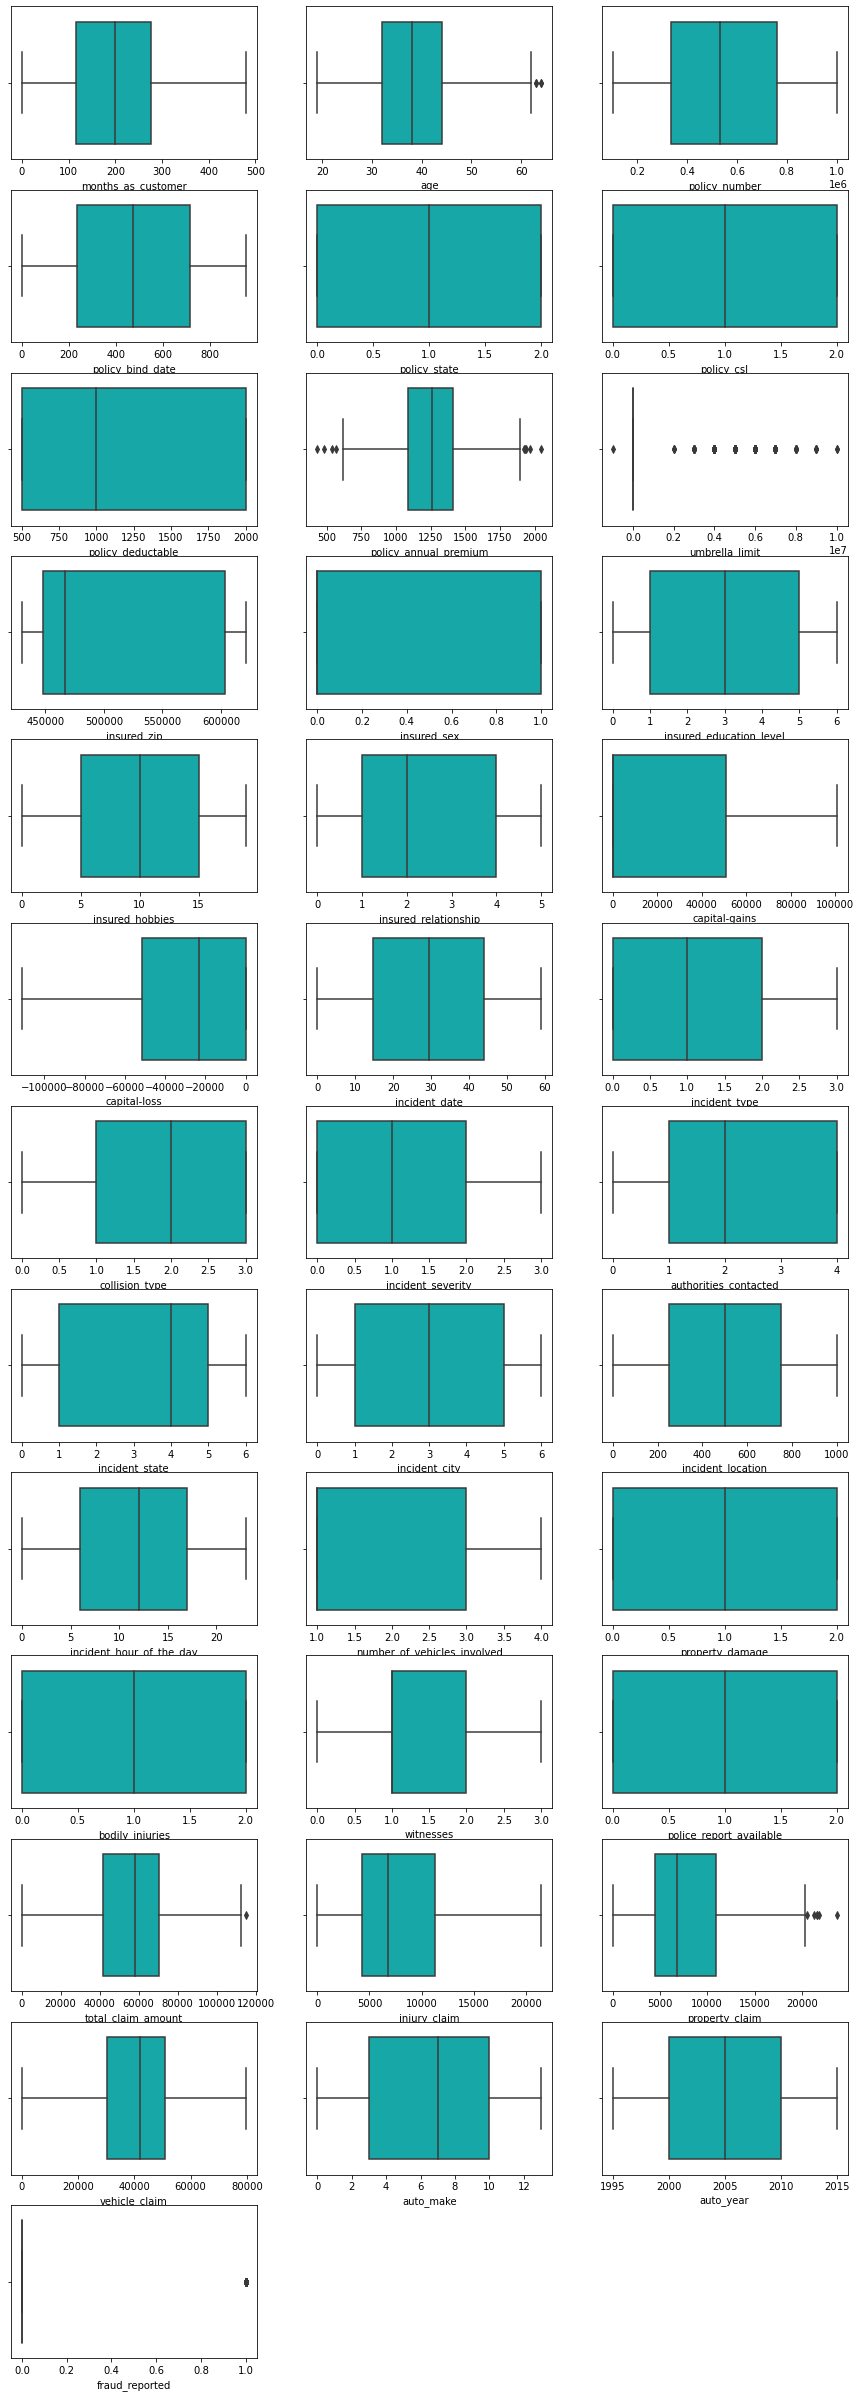

In [556]:
plt.figure(figsize=(15,50))
graph = 1

for column in data2:
    if graph <= 40:
        ax = plt.subplot(15,3, graph)
        sn.boxplot(data[column], color = 'c')
        plt.xlabel(column, fontsize = 10)
        
    graph+=1
plt.show()

#### check wheather the variables are contineous in nature as well as they are having outliers in it, after that remove that outliers of contineous data. 

#### contioeous data columns are ----> 'Age', 'policy_annual_premium', 'property_claim'
all above contineous data is having outliers in it.

In [557]:
#find the IQR (Inter Quantile Range) to identify outliers
#formula for finding IQR

#1st quantile 25%
q1 = data2.quantile(0.25)

#3rd quantile 75%
q3 = data2.quantile(0.75)

#IQR = Inter Quantile Range
iqr = q3-q1

In [558]:
data2.describe()

months_as_customer          age  policy_number  policy_bind_date  \
count         1000.000000  1000.000000    1000.000000       1000.000000   
mean           203.954000    38.948000  546238.648000        474.332000   
std            115.113174     9.140287  257063.005276        275.402851   
min              0.000000    19.000000  100804.000000          0.000000   
25%            115.750000    32.000000  335980.250000        233.750000   
50%            199.500000    38.000000  533135.000000        472.500000   
75%            276.250000    44.000000  759099.750000        713.250000   
max            479.000000    64.000000  999435.000000        950.000000   

       policy_state   policy_csl  policy_deductable  policy_annual_premium  \
count    1000.00000  1000.000000        1000.000000            1000.000000   
mean        1.01400     0.951000        1136.000000            1256.406150   
std         0.83096     0.804516         611.864673             244.167395   
min         0.00000     0.000000         500.000000             433.330000   
25%         0.00000     0.000000         500.000000            1089.607500   
50%         1.00000     1.000000        1000.000000            1257.200000   
75%         2.00000     2.000000        2000.000000            1415.695000   
max         2.00000     2.000000        2000.000000            2047.590000   

       umbrella_limit    insured_zip  ...  bodily_injuries    witnesses  \
count    1.000000e+03    1000.000000  ...      1000.000000  1000.000000   
mean     1.101000e+06  501214.488000  ...         0.992000     1.487000   
std      2.297407e+06   71701.610941  ...         0.820127     1.111335   
min     -1.000000e+06  430104.000000  ...         0.000000     0.000000   
25%      0.000000e+00  448404.500000  ...         0.000000     1.000000   
50%      0.000000e+00  466445.500000  ...         1.000000     1.000000   
75%      0.000000e+00  603251.000000  ...         2.000000     2.000000   
max      1.000000e+07  620962.000000  ...         2.000000     3.000000   

       police_report_available  total_claim_amount  injury_claim  \
count              1000.000000          1000.00000   1000.000000   
mean                  0.971000         52761.94000   7433.420000   
std                   0.810442         26401.53319   4880.951853   
min                   0.000000           100.00000      0.000000   
25%                   0.000000         41812.50000   4295.000000   
50%                   1.000000         58055.00000   6775.000000   
75%                   2.000000         70592.50000  11305.000000   
max                   2.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_make    auto_year  fraud_reported  
count     1000.000000    1000.000000  1000.000000  1000.000000     1000.000000  
mean      7399.570000   37928.950000     6.546000  2005.103000        0.247000  
std       4824.726179   18886.252893     4.034869     6.015861        0.431483  
min          0.000000      70.000000     0.000000  1995.000000        0.000000  
25%       4445.000000   30292.500000     3.000000  2000.000000        0.000000  
50%       6750.000000   42100.000000     7.000000  2005.000000        0.000000  
75%      10885.000000   50822.500000    10.000000  2010.000000        0.000000  
max      23670.000000   79560.000000    13.000000  2015.000000        1.000000  

[8 rows x 37 columns]

## Outlier detection formula 

#### Higher side ==> Q3 + (1.5 * IQR)
#### Lower side ==> Q1 - (1.5 * IQR) 

##### Outliers removal from higher side 

In [559]:
#as shown in boxplot we have outlier in higher side of Age 
#Remove outliers from higher side so, use higher side formula

age_out = (q3.age + (1.5*(iqr.age)))
age_out

62.0

In [560]:
index_out = np.where(data2['age'] > age_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

index  months_as_customer  age  policy_number  policy_bind_date  \
0        0                 328   48         521585               532   
1        1                 228   42         342868               821   
2        2                 134   29         687698               186   
3        3                 256   41         227811               766   
4        4                 228   44         367455               181   
..     ...                 ...  ...            ...               ...   
991    995                   3   38         941851               487   
992    996                 285   41         186934               129   
993    997                 130   34         918516               509   
994    998                 458   62         533940               573   
995    999                 456   60         556080               359   

     policy_state  policy_csl  policy_deductable  policy_annual_premium  \
0               2           1               1000                1406.91   
1               1           1               2000                1197.22   
2               2           0               2000                1413.14   
3               0           1               2000                1415.74   
4               0           2               1000                1583.91   
..            ...         ...                ...                    ...   
991             2           2               1000                1310.80   
992             0           0               1000                1436.79   
993             2           1                500                1383.49   
994             0           2               2000                1356.92   
995             2           1               1000                 766.19   

     umbrella_limit  ...  bodily_injuries  witnesses  police_report_available  \
0                 0  ...                1          2                        2   
1           5000000  ...                0          0                        0   
2           5000000  ...                2          3                        1   
3           6000000  ...                1          2                        1   
4           6000000  ...                0          1                        1   
..              ...  ...              ...        ...                      ...   
991               0  ...                0          1                        0   
992               0  ...                2          3                        0   
993         3000000  ...                2          3                        2   
994         5000000  ...                0          1                        2   
995               0  ...                0          3                        0   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0                 71610          6510           13020          52080   
1                  5070           780             780           3510   
2                 34650          7700            3850          23100   
3                 63400          6340            6340          50720   
4                  6500          1300             650           4550   
..                  ...           ...             ...            ...   
991               87200         17440            8720          61040   
992              108480         18080           18080          72320   
993               67500          7500            7500          52500   
994               46980          5220            5220          36540   
995                5060           460             920           3680   

     auto_make  auto_year  fraud_reported  
0           10       2004               1  
1            8       2007               1  
2            4       2007               0  
3            3       2014               1  
4            0       2009               0  
..         ...        ...             ...  
991          6       2006               0  
992         13       2015               0  
993  

after removing outliers from Age 996 rows will remains in dataframe.

In [561]:
#as shown in boxplot we have outlier in higher side of policy_annual_premium 
#Remove outliers from higher side so, use higher side formula

policy_annual_premium_out = (q3.policy_annual_premium + (1.5*(iqr.policy_annual_premium)))
policy_annual_premium_out

1904.8262499999996

In [562]:
index_out = np.where(data2['policy_annual_premium'] > policy_annual_premium_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

index  months_as_customer  age  policy_number  policy_bind_date  \
0        0                 328   48         521585               532   
1        1                 228   42         342868               821   
2        2                 134   29         687698               186   
3        3                 256   41         227811               766   
4        4                 228   44         367455               181   
..     ...                 ...  ...            ...               ...   
986    995                   3   38         941851               487   
987    996                 285   41         186934               129   
988    997                 130   34         918516               509   
989    998                 458   62         533940               573   
990    999                 456   60         556080               359   

     policy_state  policy_csl  policy_deductable  policy_annual_premium  \
0               2           1               1000                1406.91   
1               1           1               2000                1197.22   
2               2           0               2000                1413.14   
3               0           1               2000                1415.74   
4               0           2               1000                1583.91   
..            ...         ...                ...                    ...   
986             2           2               1000                1310.80   
987             0           0               1000                1436.79   
988             2           1                500                1383.49   
989             0           2               2000                1356.92   
990             2           1               1000                 766.19   

     umbrella_limit  ...  bodily_injuries  witnesses  police_report_available  \
0                 0  ...                1          2                        2   
1           5000000  ...                0          0                        0   
2           5000000  ...                2          3                        1   
3           6000000  ...                1          2                        1   
4           6000000  ...                0          1                        1   
..              ...  ...              ...        ...                      ...   
986               0  ...                0          1                        0   
987               0  ...                2          3                        0   
988         3000000  ...                2          3                        2   
989         5000000  ...                0          1                        2   
990               0  ...                0          3                        0   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0                 71610          6510           13020          52080   
1                  5070           780             780           3510   
2                 34650          7700            3850          23100   
3                 63400          6340            6340          50720   
4                  6500          1300             650           4550   
..                  ...           ...             ...            ...   
986               87200         17440            8720          61040   
987              108480         18080           18080          72320   
988               67500          7500            7500          52500   
989               46980          5220            5220          36540   
990                5060           460             920           3680   

     auto_make  auto_year  fraud_reported  
0           10       2004               1  
1            8       2007               1  
2            4       2007               0  
3            3       2014               1  
4            0       2009               0  
..         ...        ...             ...  
986          6       2006               0  
987         13       2015               0  
988  

In [563]:
#as shown in boxplot we have outlier in higher side of policy_annual_premium 
#Remove outliers from higher side so, use higher side formula

policy_annual_premium_out = (q1.policy_annual_premium - (1.5*(iqr.policy_annual_premium)))
policy_annual_premium_out

600.4762500000003

In [564]:
index_out = np.where(data2['policy_annual_premium'] < policy_annual_premium_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

index  months_as_customer  age  policy_number  policy_bind_date  \
0        0                 328   48         521585               532   
1        1                 228   42         342868               821   
2        2                 134   29         687698               186   
3        3                 256   41         227811               766   
4        4                 228   44         367455               181   
..     ...                 ...  ...            ...               ...   
982    995                   3   38         941851               487   
983    996                 285   41         186934               129   
984    997                 130   34         918516               509   
985    998                 458   62         533940               573   
986    999                 456   60         556080               359   

     policy_state  policy_csl  policy_deductable  policy_annual_premium  \
0               2           1               1000                1406.91   
1               1           1               2000                1197.22   
2               2           0               2000                1413.14   
3               0           1               2000                1415.74   
4               0           2               1000                1583.91   
..            ...         ...                ...                    ...   
982             2           2               1000                1310.80   
983             0           0               1000                1436.79   
984             2           1                500                1383.49   
985             0           2               2000                1356.92   
986             2           1               1000                 766.19   

     umbrella_limit  ...  bodily_injuries  witnesses  police_report_available  \
0                 0  ...                1          2                        2   
1           5000000  ...                0          0                        0   
2           5000000  ...                2          3                        1   
3           6000000  ...                1          2                        1   
4           6000000  ...                0          1                        1   
..              ...  ...              ...        ...                      ...   
982               0  ...                0          1                        0   
983               0  ...                2          3                        0   
984         3000000  ...                2          3                        2   
985         5000000  ...                0          1                        2   
986               0  ...                0          3                        0   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0                 71610          6510           13020          52080   
1                  5070           780             780           3510   
2                 34650          7700            3850          23100   
3                 63400          6340            6340          50720   
4                  6500          1300             650           4550   
..                  ...           ...             ...            ...   
982               87200         17440            8720          61040   
983              108480         18080           18080          72320   
984               67500          7500            7500          52500   
985               46980          5220            5220          36540   
986                5060           460             920           3680   

     auto_make  auto_year  fraud_reported  
0           10       2004               1  
1            8       2007               1  
2            4       2007               0  
3            3       2014               1  
4            0       2009               0  
..         ...        ...             ...  
982          6       2006               0  
983         13       2015               0  
984  

after removing outliers from policy_annual_premium 987 rows will remains in dataframe.

In [565]:
#Check the Outliers for property_claim
#Remove outliers from lower side so, use lower side formula

property_claim_out = (q3.property_claim + (1.5*(iqr.property_claim)))
property_claim_out

20545.0

In [566]:
index_out = np.where(data2['property_claim'] > property_claim_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

index  months_as_customer  age  policy_number  policy_bind_date  \
0        0                 328   48         521585               532   
1        1                 228   42         342868               821   
2        2                 134   29         687698               186   
3        3                 256   41         227811               766   
4        4                 228   44         367455               181   
..     ...                 ...  ...            ...               ...   
976    995                   3   38         941851               487   
977    996                 285   41         186934               129   
978    997                 130   34         918516               509   
979    998                 458   62         533940               573   
980    999                 456   60         556080               359   

     policy_state  policy_csl  policy_deductable  policy_annual_premium  \
0               2           1               1000                1406.91   
1               1           1               2000                1197.22   
2               2           0               2000                1413.14   
3               0           1               2000                1415.74   
4               0           2               1000                1583.91   
..            ...         ...                ...                    ...   
976             2           2               1000                1310.80   
977             0           0               1000                1436.79   
978             2           1                500                1383.49   
979             0           2               2000                1356.92   
980             2           1               1000                 766.19   

     umbrella_limit  ...  bodily_injuries  witnesses  police_report_available  \
0                 0  ...                1          2                        2   
1           5000000  ...                0          0                        0   
2           5000000  ...                2          3                        1   
3           6000000  ...                1          2                        1   
4           6000000  ...                0          1                        1   
..              ...  ...              ...        ...                      ...   
976               0  ...                0          1                        0   
977               0  ...                2          3                        0   
978         3000000  ...                2          3                        2   
979         5000000  ...                0          1                        2   
980               0  ...                0          3                        0   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0                 71610          6510           13020          52080   
1                  5070           780             780           3510   
2                 34650          7700            3850          23100   
3                 63400          6340            6340          50720   
4                  6500          1300             650           4550   
..                  ...           ...             ...            ...   
976               87200         17440            8720          61040   
977              108480         18080           18080          72320   
978               67500          7500            7500          52500   
979               46980          5220            5220          36540   
980                5060           460             920           3680   

     auto_make  auto_year  fraud_reported  
0           10       2004               1  
1            8       2007               1  
2            4       2007               0  
3            3       2014               1  
4            0       2009               0  
..         ...        ...             ...  
976          6       2006               0  
977         13       2015               0  
978  

after removing outliers from property_claim_out 981 rows will remains in dataframe. 

#### After removing outliers using IQR technique there are  981  rows will remains in dataset.
Now, find how much data loss in IQR method

In [567]:
((1000- 981)/1000) * 100

1.9

1.9% data loss in IQR method

In [568]:
( 981/1000)*100

98.1

98.1% data remains after removing outliers using IQR technique

### After applying Zscore and IQR technique to remove outliers. We conclude that less amount data will loss in Zscore technique so we will go with Zscore technique 

In [569]:
data2.describe()

months_as_customer         age  policy_number  policy_bind_date  \
count          981.000000  981.000000     981.000000        981.000000   
mean           204.169215   38.910296  546255.044852        474.029562   
std            113.722370    9.031922  257426.779005        276.008925   
min              0.000000   19.000000  100804.000000          0.000000   
25%            119.000000   32.000000  335780.000000        234.000000   
50%            201.000000   38.000000  533941.000000        474.000000   
75%            276.000000   44.000000  760179.000000        712.000000   
max            479.000000   62.000000  999435.000000        950.000000   

       policy_state  policy_csl  policy_deductable  policy_annual_premium  \
count    981.000000  981.000000         981.000000             981.000000   
mean       1.020387    0.946993        1141.182467            1257.690979   
std        0.830289    0.806380         612.119293             235.235958   
min        0.000000    0.000000         500.000000             617.110000   
25%        0.000000    0.000000         500.000000            1093.070000   
50%        1.000000    1.000000        1000.000000            1259.020000   
75%        2.000000    2.000000        2000.000000            1415.680000   
max        2.000000    2.000000        2000.000000            1896.910000   

       umbrella_limit    insured_zip  ...  bodily_injuries   witnesses  \
count    9.810000e+02     981.000000  ...       981.000000  981.000000   
mean     1.101937e+06  500507.672783  ...         0.991845    1.481142   
std      2.301687e+06   71405.036960  ...         0.819367    1.110663   
min     -1.000000e+06  430104.000000  ...         0.000000    0.000000   
25%      0.000000e+00  448294.000000  ...         0.000000    0.000000   
50%      0.000000e+00  466283.000000  ...         1.000000    1.000000   
75%      0.000000e+00  602842.000000  ...         2.000000    2.000000   
max      1.000000e+07  620962.000000  ...         2.000000    3.000000   

       police_report_available  total_claim_amount  injury_claim  \
count               981.000000          981.000000    981.000000   
mean                  0.974516        52616.544343   7431.335372   
std                   0.812129        26278.956522   4869.518954   
min                   0.000000          100.000000      0.000000   
25%                   0.000000        41700.000000   4300.000000   
50%                   1.000000        57900.000000   6770.000000   
75%                   2.000000        70400.000000  11280.000000   
max                   2.000000       114920.000000  21450.000000   

       property_claim  vehicle_claim   auto_make    auto_year  fraud_reported  
count      981.000000     981.000000  981.000000   981.000000      981.000000  
mean      7329.215087   37855.993884    6.553517  2005.135576        0.245668  
std       4713.441017   18844.155326    4.047478     6.006032        0.430702  
min          0.000000      70.000000    0.000000  1995.000000        0.000000  
25%       4430.000000   30240.000000    3.000000  2000.000000        0.000000  
50%       6730.000000   42120.000000    7.000000  2005.000000        0.000000  
75%      10840.000000   50720.000000   10.000000  2010.000000        0.000000  
max      20310.000000   79560.000000   13.000000  2015.000000        1.000000  

[8 rows x 37 columns]

## Check the skewness and remove that

In [570]:
new_data.skew()

months_as_customer             0.358958
age                            0.473974
policy_number                  0.031833
policy_bind_date               0.010723
policy_state                  -0.028196
policy_csl                     0.093128
policy_deductable              0.475849
policy_annual_premium          0.033107
umbrella_limit                 1.798657
insured_zip                    0.824182
insured_sex                    0.143294
insured_education_level        0.001403
insured_hobbies               -0.061489
insured_relationship           0.078491
capital-gains                  0.479472
capital-loss                  -0.379708
incident_date                  0.002649
incident_type                  0.101056
collision_type                -0.193075
incident_severity              0.274925
authorities_contacted         -0.122469
incident_state                -0.146787
incident_city                  0.047785
incident_location              0.000429
incident_hour_of_the_day      -0.040232


As we see there are some variables are skewed, whoes value is not lies between -0.5 to +0.5 this range as well as they are contineous in nature.

1. vehicle_claim
2. total_claim_amount

### Check outliers datatype. If data types of skewed column is catogorical than no need to remove skewness from that variable.

## Apply yeo-johnson transformation to remove skewness

In log transformation, we will take the log of Continues skewed data and convert that into normal data(distribution)/less skewed data and in power transformation we will take the mean value in place of 0th value.

In [571]:
#applying log transformation on skewed columns
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

new_data['vehicle_claim'] = scaler.fit_transform(new_data['vehicle_claim'].values.reshape(-1,1))
new_data['total_claim_amount'] = scaler.fit_transform(new_data['total_claim_amount'].values.reshape(-1,1))

In [572]:
new_data.skew()

months_as_customer             0.358958
age                            0.473974
policy_number                  0.031833
policy_bind_date               0.010723
policy_state                  -0.028196
policy_csl                     0.093128
policy_deductable              0.475849
policy_annual_premium          0.033107
umbrella_limit                 1.798657
insured_zip                    0.824182
insured_sex                    0.143294
insured_education_level        0.001403
insured_hobbies               -0.061489
insured_relationship           0.078491
capital-gains                  0.479472
capital-loss                  -0.379708
incident_date                  0.002649
incident_type                  0.101056
collision_type                -0.193075
incident_severity              0.274925
authorities_contacted         -0.122469
incident_state                -0.146787
incident_city                  0.047785
incident_location              0.000429
incident_hour_of_the_day      -0.040232


<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

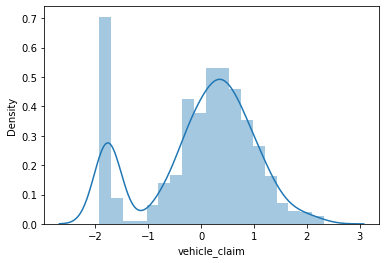

In [573]:
sn.distplot(new_data['vehicle_claim'])

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

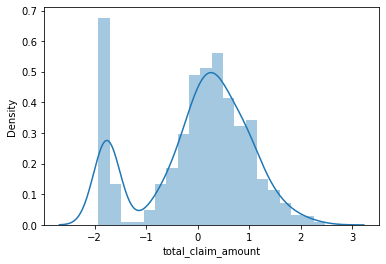

In [574]:
sn.distplot(new_data['total_claim_amount'])

##### As shown in plot skewness removes after using yeo-johnson transformation skewness removal technique.

## Seperating the columns into featuers and target:

#### X= features, y=Target 

In [575]:
x = new_data.drop(columns = 'fraud_reported', axis=1)
y = new_data['fraud_reported']

## Scalling technique

In [576]:
#import Libraries
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scaled = ss.fit_transform(x)

variables are scaled now using standard scaler technique.

## Variance inflation factor

In [577]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_res, i) for i in range(x_res.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

vif                     Features
0       7.413245           months_as_customer
1       7.347991                          age
2       1.059062                policy_number
3       1.052066             policy_bind_date
4       1.063304                 policy_state
5       1.053911                   policy_csl
6       1.050516            policy_deductable
7       1.077153        policy_annual_premium
8       1.038087               umbrella_limit
9       1.054509                  insured_zip
10      1.044776                  insured_sex
11      1.053186      insured_education_level
12      1.086003              insured_hobbies
13      1.067051         insured_relationship
14      1.048233                capital-gains
15      1.062379                 capital-loss
16      1.065638                incident_date
17      5.812944                incident_type
18      1.792261               collision_type
19      1.278760            incident_severity
20      1.122006        authorities_contacted
21      1.086357               incident_state
22      1.054217                incident_city
23      1.064950            incident_location
24      1.149985     incident_hour_of_the_day
25      5.761791  number_of_vehicles_involved
26      1.069200              property_damage
27      1.036287              bodily_injuries
28      1.064151                    witnesses
29      1.070003      police_report_available
30  50248.950169           total_claim_amount
31   1936.013245                 injury_claim
32   2014.224129               property_claim
33  25022.723263                vehicle_claim
34      1.038463                    auto_make
35      1.072242                    auto_year

In [581]:
new_data= new_data.drop(['total_claim_amount'], axis=1)

In [582]:
x = new_data.drop(columns = 'fraud_reported', axis=1)
y = new_data['fraud_reported']

In [583]:
#import Libraries
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scaled = ss.fit_transform(x)

In [585]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

vif                     Features
0   6.828640           months_as_customer
1   6.843023                          age
2   1.024666                policy_number
3   1.029361             policy_bind_date
4   1.036451                 policy_state
5   1.029583                   policy_csl
6   1.036305            policy_deductable
7   1.039925        policy_annual_premium
8   1.029522               umbrella_limit
9   1.031103                  insured_zip
10  1.030116                  insured_sex
11  1.039083      insured_education_level
12  1.050476              insured_hobbies
13  1.048418         insured_relationship
14  1.034999                capital-gains
15  1.039843                 capital-loss
16  1.034157                incident_date
17  5.124414                incident_type
18  1.691228               collision_type
19  1.210624            incident_severity
20  1.077885        authorities_contacted
21  1.045472               incident_state
22  1.029899                incident_city
23  1.038844            incident_location
24  1.101684     incident_hour_of_the_day
25  5.131787  number_of_vehicles_involved
26  1.036324              property_damage
27  1.024566              bodily_injuries
28  1.043943                    witnesses
29  1.032002      police_report_available
30  2.171364                 injury_claim
31  2.251779               property_claim
32  3.642669                vehicle_claim
33  1.038473                    auto_make
34  1.043161                    auto_year

now we can see the vif value of all columns is less than 10 so we can proceed further

## Sampling

In [588]:
x = new_data.drop(columns = 'fraud_reported', axis=1)
y = new_data['fraud_reported']

In [589]:
#import Libraries
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scaled = ss.fit_transform(x)

In [590]:
y.value_counts()

0    749
1    246
Name: fraud_reported, dtype: int64

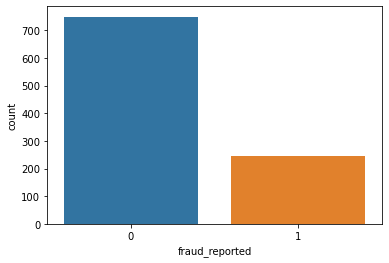

In [591]:
#visualization of target variable 
sn.countplot(new_data["fraud_reported"])
plt.show()

As we can see there is class imbalance in target varibale, so we need to balance that with sampling otherwise the model will get bias.

### Oversampling

In [592]:
from imblearn.over_sampling import RandomOverSampler  #Random Over Sampler
ROS = RandomOverSampler()
x_res, y_res = ROS.fit_resample(x_scaled, y) # it will resample the data
print(y_res.value_counts()) # after this all classes will be balaned

1    749
0    749
Name: fraud_reported, dtype: int64


In [593]:
y_res.value_counts()

1    749
0    749
Name: fraud_reported, dtype: int64

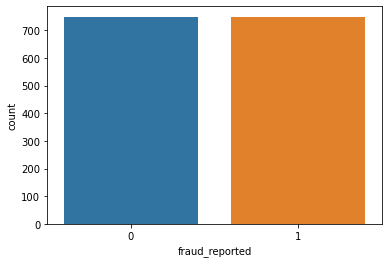

In [594]:
#visualization of target variable 
sn.countplot(y_res)
plt.show()

## Finding best random state 

In [595]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [596]:
from sklearn.tree import DecisionTreeClassifier
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size=.30, random_state=i)
    mod= DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "on Random_state ", maxRS)

Best accuracy is  0.9422222222222222 on Random_state  168


In [597]:
x_train,x_test,y_train,y_test = train_test_split(x_res, y_res, test_size=0.25, random_state = 168)

## 1.Logistic Regression Model

In [598]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Log_reg =LogisticRegression()
Log_reg.fit(x_train, y_train)

LogisticRegression()

In [599]:
pred_test=Log_reg.predict(x_test)

In [600]:
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.728
[[140  48]
 [ 54 133]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       188
           1       0.73      0.71      0.72       187

    accuracy                           0.73       375
   macro avg       0.73      0.73      0.73       375
weighted avg       0.73      0.73      0.73       375



In [601]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(Log_reg, x_res, y_res, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.7122898550724639

###### The Accuracy score for logistic regression model is : 72.80%
###### Cross validation score for logistic regression is : 71.22%

## 2.Random forest Classifier

In [602]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters ={'criterion':['gini', 'entropy'], 'max_features':["auto","sqrt","log2"]}
Rfr= RandomForestClassifier()
clf =GridSearchCV(Rfr, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'log2'}


In [604]:
Rfr =RandomForestClassifier(criterion = "entropy", max_features="log2")
Rfr.fit(x_train, y_train)
Rfr.score(x_train, y_train)
pred_decision = Rfr.predict(x_test)

Rfrs = accuracy_score(y_test,pred_decision)
print('accuracy score: ',Rfrs*100)

Rfrscore = cross_val_score(Rfr, x_res, y_res, cv=3)
Rfrc = Rfrscore.mean()
print('Cross Val Score: ',Rfrc*100)

accuracy score:  92.26666666666667
Cross Val Score:  91.99104876419506


###### The Accuracy score for Random Forest Classifier model is : 92.26%
###### Cross validation score for Random Forest Classifier is : 91.99%

## 3.Decision Tree Classifier

In [605]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [606]:
pred_DT = DT.predict(x_test)
print(accuracy_score(y_test,pred_DT))

0.9253333333333333


In [607]:
print(confusion_matrix(y_test,pred_DT))
print(classification_report(y_test,pred_DT))

[[165  23]
 [  5 182]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       188
           1       0.89      0.97      0.93       187

    accuracy                           0.93       375
   macro avg       0.93      0.93      0.93       375
weighted avg       0.93      0.93      0.93       375



In [608]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(DT, x_res, y_res, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.9105819397993311

###### The Accuracy score for Decision tree Classifier model is : 90.27%
###### Cross validation score for Decision tree Classifier is : 90.47%

## 4.Support vector Classifier

In [609]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(x_train, y_train)

SVC()

In [610]:
pred_sv = sv.predict(x_test)
print(accuracy_score(y_test,pred_sv))

0.8533333333333334


In [611]:
print(confusion_matrix(y_test,pred_sv))
print(classification_report(y_test,pred_sv))

[[157  31]
 [ 24 163]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       188
           1       0.84      0.87      0.86       187

    accuracy                           0.85       375
   macro avg       0.85      0.85      0.85       375
weighted avg       0.85      0.85      0.85       375



In [612]:
cv_score= cross_val_score(sv, x_res, y_res, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8404838350055741

###### The Accuracy score for SVC model is : 83.54%
###### Cross validation score for SVC is : 81.74%

## Comparison of all model

#### The difference between Cross validation score  and logistic regression model is: 1.58%
#### The difference between Cross validation score  and Random Forest Classifier model is: 0.27%
#### The difference between Cross validation score  and Decision tree Classifier  model is: 1.48%
#### The difference between Cross validation score  and SVC model is: 1.29%

### as shown in above  Random Forest Classifier is having minimum difference, so Random Forest Classifier is best model

# Hyper parameter tuning

## Hyper parameter tunning  Decision tree Classifier model

In [613]:
#Random forest Classifier

Parameters = {'n_estimators' : [200, 700],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth' : [4, 5, 6, 7, 8],
              'criterion' : ['gini', 'entropy']}

In [614]:
GCV=GridSearchCV(RandomForestClassifier(),Parameters,cv=5)

In [615]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [616]:
GCV.best_params_ # printing the best parameters found by GridSearchCV

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [617]:
mod = RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'log2', n_estimators= 200)

mod.fit(x_train, y_train)
pred =mod.predict(x_test)
print(accuracy_score(y_test, pred)*100)

90.13333333333333


after hyper parameter tunning of Random forest classifier accuracy score is: 90.133%

## Boosting of model with adaboost

In [618]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [619]:
ada.fit(x_train, y_train)
y_pred = ada.predict(x_train)

In [620]:
from sklearn import metrics
print('accuracy square score', metrics.accuracy_score(y_train, y_pred))

accuracy square score 0.8655387355298308


after boosting of model the model accuracy raise to : 86.55%

## ROC AUC curve to choose best model

In [621]:
# plot ROC/AUC for multiple models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [622]:
lr = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sv = SVC()

In [623]:
#train all classifiers
lr.fit(x_train, y_train)
rf.fit(x_train, y_train)
dt.fit(x_train, y_train)
sv.fit(x_train, y_train)

print("Now all models are trained")

Now all models are trained


In [624]:
#All model score captured

lr.score(x_train, y_train)
rf.score(x_train, y_train)
dt.score(x_train, y_train)
sv.score(x_train, y_train)

print("all model test score captured")

all model test score captured


## Find ROC AUC Score

In [625]:
#logistic Regression
roc_auc_score(y_test, lr.predict(x_test))

0.727955398793947

In [626]:
# Random Forest Classifier
roc_auc_score(y_test, rf.predict(x_test))

0.9173967459324155

In [627]:
#Decision Tree Classifier
roc_auc_score(y_test, dt.predict(x_test))

0.9387586756172488

In [628]:
#SVC
roc_auc_score(y_test, sv.predict(x_test))

0.8533820684947092

## Ploting AUC ROC curve

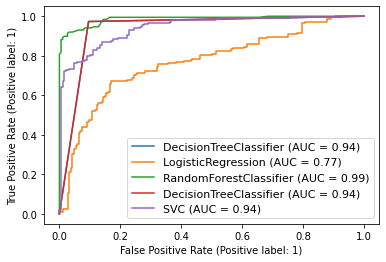

In [629]:
disp = plot_roc_curve(dt, x_test, y_test)

plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)

plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)

plot_roc_curve(dt, x_test, y_test, ax=disp.ax_)

plot_roc_curve(sv, x_test, y_test, ax=disp.ax_)

plt.legend(prop = {'size':11}, loc='lower right')

plt.show()

## Saving the model 

In [630]:
import joblib
joblib.dump(mod,"InsuranceFraud.pkl")

['InsuranceFraud.pkl']

## Loding model

In [631]:
model = joblib.load("InsuranceFraud.pkl")

In [632]:
prediction = model.predict(x_test)

In [633]:
prediction=pd.DataFrame(prediction)
#converted into data frame

In [634]:
prediction.to_csv('InsuranceFraudResults.csv', index = False)
#prediction saving

#### model saved